In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Extraction

## Computing unique permno values and extracting price data from CRSP from 2011-01-01 to 2021-12-31


In [2]:
input_file_a1 = pd.read_csv('sp500_w_addl_id.csv')
permno = input_file_a1['permno'].unique()

/Users/srishti/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
len(permno)

727

$\implies$ There are 727 unique permnos.

In [4]:
output_str_permno = ""
for auto in permno:
    output_str_permno += str(int(auto))+'\n'

In [5]:
with open('permno.txt', 'w') as f:
    f.write('readme')

## This data is used as input to the CRSP
- The stock level data is extracted in **returns.csv** from https://wrds-www.wharton.upenn.edu/pages/get-data/center-research-security-prices-crsp/annual-update/stock-security-files/daily-stock-file/
- SnP Returns are computed in **snp_returns.csv** from https://wrds-www.wharton.upenn.edu/pages/get-data/center-research-security-prices-crsp/annual-update/index-sp-500-indexes/index-file-on-sp-500/

In [6]:
urls = pd.read_csv('finalURLs.csv', parse_dates = ['filingDate'])
stockreturns = pd.read_csv('returns.csv', parse_dates = ['date'])
snp = pd.read_csv('snp_returns.csv', parse_dates = ['caldt'])

/Users/srishti/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/srishti/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
snp.describe()

,vwretd,vwretx,ewretd,ewretx,sprtrn
count,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000
mean,0.000618,0.000537,0.000607,0.000527,0.000540
std,0.010744,0.010742,0.011746,0.011744,0.010769
min,-0.118970,-0.119008,-0.126864,-0.126960,-0.119841
25%,-0.003295,-0.003353,-0.003944,-0.004050,-0.003379
50%,0.000778,0.000701,0.000902,0.000799,0.000703
75%,0.005421,0.005337,0.006066,0.005978,0.005363
max,0.093205,0.092870,0.117414,0.117279,0.093828


In [8]:
snp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   caldt   2769 non-null   datetime64[ns]
 1   vwretd  2769 non-null   float64       
 2   vwretx  2769 non-null   float64       
 3   ewretd  2769 non-null   float64       
 4   ewretx  2769 non-null   float64       
 5   sprtrn  2769 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 129.9 KB


In [9]:
stockreturns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750818 entries, 0 to 1750817
Data columns (total 16 columns):
 #   Column    Dtype         
---  ------    -----         
 0   PERMNO    int64         
 1   date      datetime64[ns]
 2   EXCHCD    int64         
 3   NCUSIP    object        
 4   TICKER    object        
 5   COMNAM    object        
 6   PRIMEXCH  object        
 7   TRDSTAT   object        
 8   PERMCO    int64         
 9   CUSIP     object        
 10  RCRDDT    object        
 11  NWPERM    float64       
 12  PRC       float64       
 13  VOL       float64       
 14  CFACPR    float64       
 15  OPENPRC   float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(7)
memory usage: 213.7+ MB


In [10]:
stockreturns['PERMNO'].nunique()

727

-- Same number of permno

In [11]:
stockreturns.describe()

,PERMNO,EXCHCD,PERMCO,NWPERM,PRC,VOL,CFACPR,OPENPRC
count,1.750818e+06,1.750818e+06,1.750818e+06,152.000000,1.750179e+06,1.750179e+06,1.750671e+06,1.750173e+06
mean,5.736415e+04,1.522250e+00,2.466289e+04,27320.401316,9.241775e+01,4.340953e+06,1.148471e+00,9.240237e+01
std,2.914559e+04,8.811225e-01,1.567475e+04,33250.731065,1.654568e+02,1.016477e+07,9.055191e-01,1.654139e+02
min,1.010400e+04,0.000000e+00,7.000000e+00,0.000000,-3.488000e+01,0.000000e+00,5.000000e-03,1.300000e-01
25%,2.508100e+04,1.000000e+00,1.292600e+04,0.000000,3.429000e+01,9.295860e+05,1.000000e+00,3.428000e+01
50%,6.540200e+04,1.000000e+00,2.116100e+04,14409.000000,5.883000e+01,1.948225e+06,1.000000e+00,5.881000e+01
75%,8.438100e+04,3.000000e+00,3.474600e+04,60599.000000,9.903000e+01,4.239578e+06,1.000000e+00,9.902000e+01
max,9.343600e+04,5.000000e+00,5.823500e+04,93159.000000,5.959330e+03,1.809606e+09,2.800000e+01,5.977610e+03


## Renaming Relevant Columns

In [12]:
stock_returns = stockreturns[['date', 'PERMNO', 'PRC']].rename({'date':'Date', 'PRC': 'ClosePrice', 'PERMNO': 'permno' }, axis=1)

In [13]:
snp = snp[['caldt', 'vwretx', 'ewretx']].rename({'caldt':'Date', 'vwretx': 'ValueWeightedReturnSnP', 'ewretx': 'EqualWeightedReturnSnP' }, axis=1)

# Calculating Returns
$\textbf{Note}$

- Returns for a filing day n = $\frac{ClosePrice_{n+3}}{ClosePrice_{n}}$ - 1

- For calculating returns, we will assume that **dividends do not matter** as dividends can usually not be obtained by buying on Day 0 and Selling on Day 3.



## Calculating S&P Returns

- Selecting Returns without Dividends
- For Calculating 3D forward looking return on Day n, we need to compute $(1+return_{n+1})*(1+return_{n+2})*(1+return_{n+3})-1$

In [14]:
snp 

,Date,ValueWeightedReturnSnP,EqualWeightedReturnSnP
0,2011-01-03,0.011291,0.011393
1,2011-01-04,-0.001254,-0.005429
2,2011-01-05,0.005039,0.005384
3,2011-01-06,-0.002089,-0.001959
4,2011-01-07,-0.001757,-0.001308
...,...,...,...
2764,2021-12-27,0.013611,0.012717
2765,2021-12-28,-0.000978,0.001400
2766,2021-12-29,0.001272,0.002826
2767,2021-12-30,-0.003045,-0.001697


In [15]:
snp['onePlusValueWeightedReturnSnP'] = 1.0 + snp['ValueWeightedReturnSnP']
snp['onePlusEqualWeightedReturnSnP'] = 1.0 + snp['EqualWeightedReturnSnP']

In [16]:
cum_snp = snp.iloc[::-1].rolling(4, on='Date',min_periods=4).apply(np.product).iloc[::-1]

In [17]:
cum_snp = cum_snp.rename({'onePlusValueWeightedReturnSnP': 'OnePlusValueWeightedReturn4DSnP', 'onePlusEqualWeightedReturnSnP': 'OnePlusEqualWeightedReturn4DSnP'}, axis=1)


In [18]:
cum_snp = cum_snp[['Date', 'OnePlusValueWeightedReturn4DSnP', 'OnePlusEqualWeightedReturn4DSnP']]

In [19]:
snp = pd.merge(snp, cum_snp, on='Date')

In [20]:
snp['ValueWeightedReturn3DSnP'] = snp['OnePlusValueWeightedReturn4DSnP']/snp['onePlusValueWeightedReturnSnP'] - 1.0
snp['EqualWeightedReturn3DSnP'] = snp['OnePlusEqualWeightedReturn4DSnP']/snp['onePlusEqualWeightedReturnSnP'] - 1.0

snp = snp.drop(['onePlusValueWeightedReturnSnP','onePlusEqualWeightedReturnSnP','OnePlusValueWeightedReturn4DSnP','OnePlusEqualWeightedReturn4DSnP'], axis =1)


In [21]:
snp.head()

,Date,ValueWeightedReturnSnP,EqualWeightedReturnSnP,ValueWeightedReturn3DSnP,EqualWeightedReturn3DSnP
0,2011-01-03,0.011291,0.011393,0.001682,-0.002033
1,2011-01-04,-0.001254,-0.005429,0.001177,0.002102
2,2011-01-05,0.005039,0.005384,-0.005385,-0.003859
3,2011-01-06,-0.002089,-0.001959,0.000513,0.002096
4,2011-01-07,-0.001757,-0.001308,0.011218,0.012342


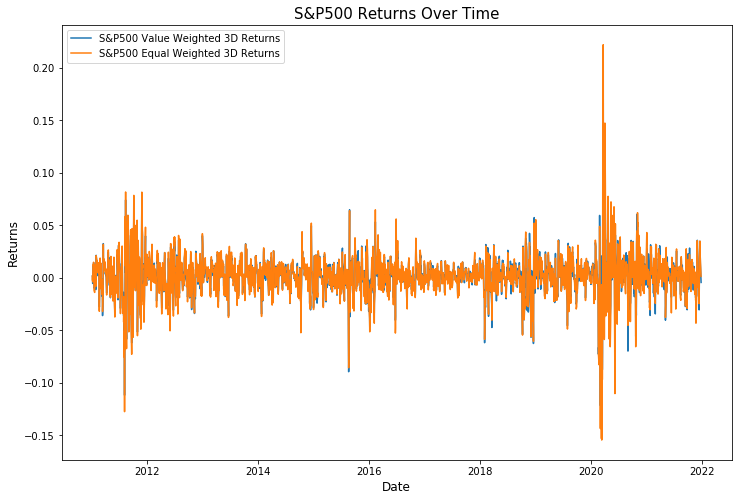

In [31]:
plt.title('S&P500 Returns Over Time', size =15)
plt.plot(snp['Date'], snp['ValueWeightedReturn3DSnP'], label='S&P500 Value Weighted 3D Returns')
plt.plot(snp['Date'], snp['EqualWeightedReturn3DSnP'], label='S&P500 Equal Weighted 3D Returns')
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Date', size =12)
plt.legend()
plt.ylabel('Returns', size =12)
plt.show()

## Calculating Stock Returns 

Since PERMNO is unique to a share class, doing a groupby and taking returns over PERMNO should suffice since the data is already sorted on date. 

In [54]:
cum_stock_returns = stock_returns.iloc[::-1].groupby('permno').rolling(2, on='Date',min_periods=2).apply(np.product).iloc[::-1]

In [55]:
cum_stock_returns = cum_stock_returns.drop('permno', axis =1).reset_index()

In [56]:

cum_stock_returns = cum_stock_returns[['Date', 'permno', 'ClosePrice']].rename({"ClosePrice": "ClosePriceProduct"}, axis = 1)


In [57]:
stock_returns = pd.merge(stock_returns, cum_stock_returns, on = ['Date', 'permno'])

In [58]:
stock_returns['OnePlusReturn'] = stock_returns['ClosePriceProduct']/ (stock_returns['ClosePrice']*stock_returns['ClosePrice'])

In [59]:
cum_stock_returns = stock_returns.iloc[::-1].groupby('permno').rolling(3, on='Date',min_periods=3).apply(np.product).iloc[::-1]


In [60]:
cum_stock_returns = cum_stock_returns.drop('permno', axis =1).reset_index()

In [61]:
cum_stock_returns['StockReturn3D'] = cum_stock_returns['OnePlusReturn']-1

In [62]:
cum_stock_returns = cum_stock_returns[['Date', 'permno', 'StockReturn3D']]

In [63]:
stock_returns = pd.merge(stock_returns, cum_stock_returns, on = ['Date', 'permno'])

## Merging Stock Returns and SnP returns to calculate excess returns

In [27]:
stock_returns = stock_returns.dropna()

In [28]:
snp = snp.dropna()

In [29]:
stock_returns = pd.merge(stock_returns,snp, on='Date', how='left')

In [30]:
stock_returns

,Date,permno,ClosePrice,ClosePriceProduct,OnePlusReturn,StockReturn3D,ValueWeightedReturnSnP,EqualWeightedReturnSnP,ValueWeightedReturn3DSnP,EqualWeightedReturn3DSnP
0,2011-01-03,10104,31.62000,9.953976e+02,0.995572,-1.423150e-02,0.011291,0.011393,0.001682,-0.002033
1,2011-01-04,10104,31.48000,9.771392e+02,0.986023,-1.429479e-02,-0.001254,-0.005429,0.001177,0.002102
2,2011-01-05,10104,31.04000,9.675168e+02,1.004188,2.220446e-16,0.005039,0.005384,-0.005385,-0.003859
3,2011-01-06,10104,31.17000,9.672051e+02,0.995509,-5.774783e-03,-0.002089,-0.001959,0.000513,0.002096
4,2011-01-07,10104,31.03000,9.631712e+02,1.000322,-2.739285e-03,-0.001757,-0.001308,0.011218,0.012342
...,...,...,...,...,...,...,...,...,...,...
1748060,2021-12-21,93436,938.53003,9.468548e+05,1.074947,1.655886e-01,0.017807,0.020616,0.030573,0.026850
1748061,2021-12-22,93436,1008.87000,1.076464e+06,1.057619,7.890013e-02,0.010279,0.007143,0.019090,0.020994
1748062,2021-12-23,93436,1067.00000,1.167234e+06,1.025248,1.798495e-02,0.006390,0.006764,0.013908,0.017001
1748063,2021-12-27,93436,1093.93994,1.190721e+06,0.995000,-2.157337e-02,0.013611,0.012717,-0.002753,0.002526


In [31]:
stock_returns['ExcessReturnsEqualWeightedSnP'] = stock_returns['StockReturn3D'] - stock_returns['EqualWeightedReturn3DSnP'] 
stock_returns['ExcessReturnsValueWeightedSnP'] = stock_returns['StockReturn3D'] - stock_returns['ValueWeightedReturn3DSnP'] 


In [32]:
excess_returns = stock_returns[['Date', 'permno','ExcessReturnsEqualWeightedSnP', 'ExcessReturnsValueWeightedSnP']]

In [33]:
excess_returns = excess_returns.rename({'Date': 'filingDate'}, axis=1)

## Merging Excess Returns with URL data

In [34]:
finalMergedData = pd.merge(urls, excess_returns, on=['filingDate', 'permno'], how= 'left')

In [35]:
dates =  finalMergedData[finalMergedData['ExcessReturnsEqualWeightedSnP'].isnull()]['date'].unique()

In [36]:
from datetime import date, datetime
import calendar

In [37]:
print(finalMergedData[finalMergedData['ExcessReturnsEqualWeightedSnP'].isnull()]['date'].value_counts())

2021-12-31    421
2012-09-30     25
2021-11-30     12
2016-06-30      3
2018-09-30      3
2011-03-31      3
2019-03-31      3
2012-08-31      2
2012-02-29      2
2015-12-31      1
2017-06-30      1
2015-06-30      1
2018-02-28      1
2012-06-30      1
2016-03-31      1
2021-02-28      1
2016-12-31      1
2015-05-31      1
2018-01-31      1
2016-01-31      1
2014-03-31      1
2014-12-31      1
2020-03-31      1
2019-02-28      1
2017-09-30      1
2018-12-31      1
2013-06-30      1
2015-02-28      1
Name: date, dtype: int64


In [32]:
# for ele in dates:
#     ele = datetime.strptime(ele, '%Y-%m-%d')
#     print(ele, calendar.day_name[ele.weekday()])

In [39]:
finalMergedData = finalMergedData[finalMergedData['ExcessReturnsEqualWeightedSnP'].notna()].reset_index(drop=True)

In [40]:
finalMergedData['ExcessReturnsValueWeightedSnP'].notna().unique()

array([ True])

In [41]:
finalMergedData.to_csv('url_with_returns.csv', index=False)